In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn.activation_functions import *
from nn.layers import Dense, InLayer
from nn.nets import Net
from nn.cost_functions import *

In [ ]:
net = Net([
    InLayer(units=784),
    Dense(units=20, activation=ReLU),
    Dense(units=15, activation=ReLU),
    Dense(units=15, activation=ReLU),
    Dense(units=10, activation=softmax),
    ], cost_function=CrossEntropyLoss)

In [51]:
net = Net.load_model('classification_models/3h.npz')

In [32]:
net.save_model('classification_models/3h')

In [4]:
from keras.datasets import mnist

(X_train_og, Y_label), (X_test, Y_test_label) = mnist.load_data()
# Convert to 2d arrays rather than 3d
X_train = np.reshape(X_train_og, (X_train_og.shape[0], X_train_og.shape[1]*X_train_og.shape[2])) /255
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2])) /255

Y_train = np.eye(10)[Y_label]
Y_test = np.eye(10)[Y_test_label]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [5]:
net.compute_cost(X_train, Y_train) # very high

np.float64(2.8075973203018307)

In [6]:
net.compute_accuracy(X_train, Y_train)

np.float64(0.10103333333333334)

In [48]:
J_history = net.gradient_descent(X_train, Y_train, alpha=0.0002, epochs=3000, batch_size=512)

Initial cost   : Cost 0.051922
Epoch         0: Cost 0.051922
Epoch       500: Cost 0.051769
Epoch      1000: Cost 0.051616
Epoch      1500: Cost 0.051462
Epoch      2000: Cost 0.051308
Epoch      2500: Cost 0.051153
Epoch      2999: Cost 0.050998


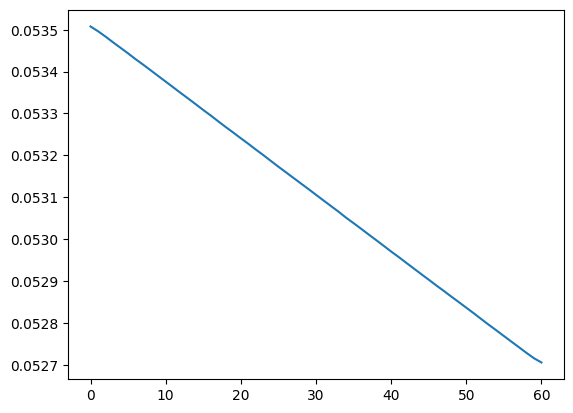

In [39]:
plt.plot(J_history[:])

In [52]:
net.compute_accuracy(X_test, Y_test) # near 1

np.float64(0.9567)

In [53]:
net.compute_accuracy(X_train, Y_train) # near 1

np.float64(0.985)

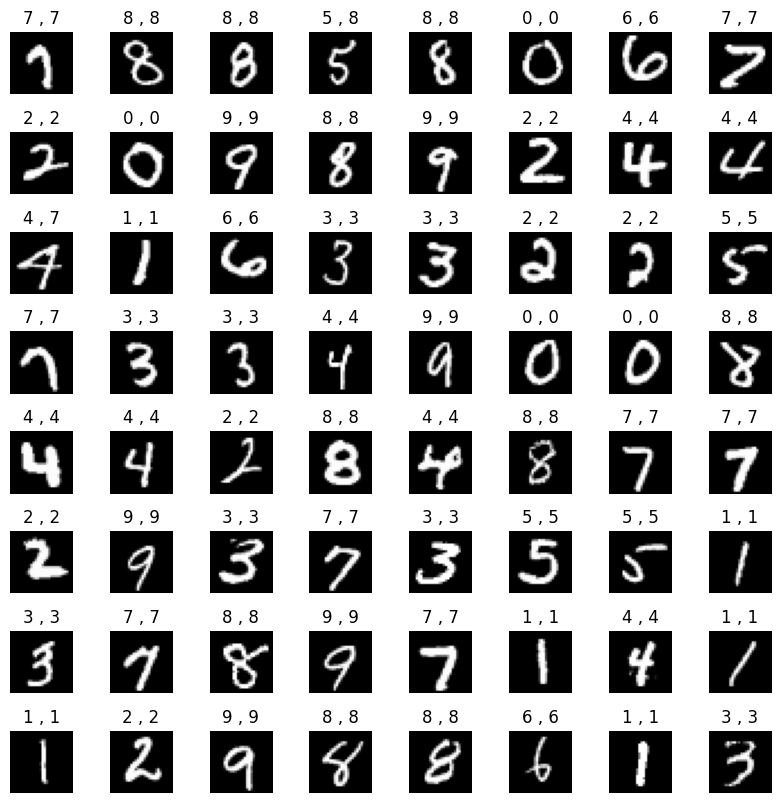

In [7]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(10000)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image

    ax.imshow(X_random_reshaped, cmap='gray')
    y_pred = net.predict(X_random_reshaped.reshape((1, 784)))
    y_pred_label = np.argmax(y_pred, axis=1)
    
    
    # Display the label above the image
    ax.set_title(f'{Y_test_label[random_index]} , {y_pred_label[0]}')
    ax.set_axis_off()

In [5]:
net.compute_accuracy(X_train, Y_train)

np.float64(0.9752166666666666)

In [12]:
net2 = Net.load_model('classification_models/3h.npz')

In [13]:
net2.compute_accuracy(X_train, Y_train)

np.float64(0.9752166666666666)